# Loading Datasets

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('All_CSV/avocado.csv')

# Feature Engineering

In [19]:
df.shape

(18249, 14)

In [27]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
df = df.drop(columns=['Date', 'Unnamed: 0'])

# Heat Map

In [28]:
import seaborn as sns

<Axes: >

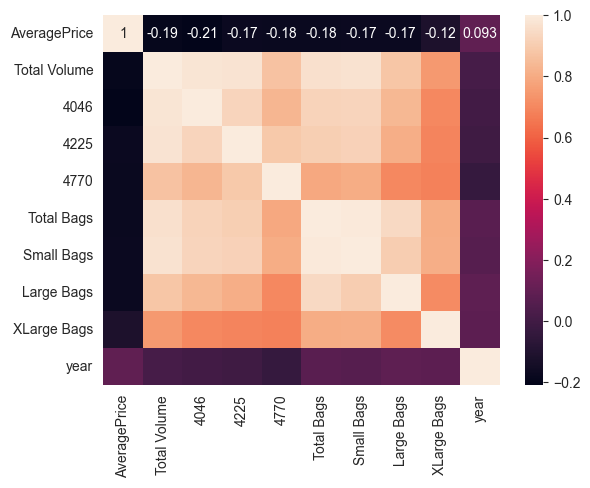

In [31]:
sns.heatmap(df.drop(columns=['region', 'type']).corr(), annot=True)

# Encoding

In [32]:
from Machine_Learning.Encoder import Encoder

In [33]:
encode = Encoder(df.drop(columns=['AveragePrice']), df['AveragePrice'], onehot_code=['type', 'region'])

In [34]:
x, y = encode.encode()

# Model Training

In [36]:
from sklearn.ensemble import RandomForestRegressor
from Model_Training import Model_Training

In [37]:
model_random_forest_regressor = Model_Training(RandomForestRegressor(n_estimators=500, max_samples=0.5, max_features=0.5, max_depth=5), x, y)

In [38]:
score_random_forest_regressor = model_random_forest_regressor.run()

In [39]:
score_random_forest_regressor.get_score()

,r2_score,mean_absolute_error,mean_squared_error,cross_val_score
0,0.607701,0.061833,0.19051,0.596307


# Linear regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model_linear_regression = Model_Training(LinearRegression(), x, y)

In [43]:
score_linear_regression = model_linear_regression.run()

In [44]:
score_linear_regression.get_score()

,r2_score,mean_absolute_error,mean_squared_error,cross_val_score
0,0.562144,0.07156,0.199444,0.552376


# Bagging Regression

In [45]:
from sklearn.ensemble import BaggingRegressor

In [46]:
model_bagging_regression = Model_Training(BaggingRegressor(n_estimators=500, max_samples=0.5, max_features=0.5), x, y)

In [47]:
score_bagging_regression = model_bagging_regression.run()

In [ ]:
score_bagging_regression.get_score()